## Data Analysis 

In [1]:
import pandas as pd

In [2]:
X_train = pd.read_csv("./training_zscored.csv")
y_train = X_train[X_train.columns[-1]]
X_train = X_train[X_train.columns[:-1]]

X_test  = pd.read_csv("./testing_zscored.csv")
y_test  = X_test[X_test.columns[-1]]
X_test  = X_test[X_test.columns[:-1]]

In [3]:
trainX = X_train
trainY = y_train
testX = X_test
y_true= y_test

## Deicision Tree Classifier

In [4]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(trainX,trainY)

#Predict the response for test dataset
y_pred = clf.predict(testX)

In [6]:
macro = precision_recall_fscore_support(y_true, y_pred, average='macro')[:-1]
micro = precision_recall_fscore_support(y_true, y_pred, average='micro')[:-1]
weighted = precision_recall_fscore_support(y_true, y_pred, average='weighted')[:-1]
print("For metrics = 'macro', precision, recall, f1 score are: ", macro, "respectivly")
print("For metrics = 'micro', precision, recall, f1 score are: ", micro, "respectivly")
print("For metrics = 'weighted', precision, recall, f1 score are: ", weighted, "respectivly")

For metrics = 'macro', precision, recall, f1 score are:  (0.7260869565217392, 0.7141176470588235, 0.7190344480764395) respectivly
For metrics = 'micro', precision, recall, f1 score are:  (0.7549668874172185, 0.7549668874172185, 0.7549668874172185) respectivly
For metrics = 'weighted', precision, recall, f1 score are:  (0.7500719838756119, 0.7549668874172185, 0.7516398097004797) respectivly


In [7]:
def decision_tree(trainX, trainY):
    clf = DecisionTreeClassifier() # Create Decision Tree classifer object
    clf = clf.fit(trainX,trainY)   # Train  Decision Tree Classifer 
    
    y_pred_tr = clf.predict(trainX)
    y_pred    = clf.predict(testX) # Predict the response for test dataset
    
    # Report
    print("Training result: ")
    macro = precision_recall_fscore_support(trainY, y_pred_tr, average='macro')[:-1]
    micro = precision_recall_fscore_support(trainY, y_pred_tr, average='micro')[:-1]
    weighted = precision_recall_fscore_support(trainY, y_pred_tr, average='weighted')[:-1]
    print("  For metrics = 'macro', precision, recall, f1 score are: ", macro, "respectivly")
    print("  For metrics = 'micro', precision, recall, f1 score are: ", micro, "respectivly")
    print("  For metrics = 'weighted', precision, recall, f1 score are: ", weighted, "respectivly")
    print("  For AUC, it's: ", roc_auc_score(trainY, y_pred_tr))
    print(" ")
    
    print("Testing result: ")
    macro = precision_recall_fscore_support(y_true, y_pred, average='macro')[:-1]
    micro = precision_recall_fscore_support(y_true, y_pred, average='micro')[:-1]
    weighted = precision_recall_fscore_support(y_true, y_pred, average='weighted')[:-1]
    print("  For metrics = 'macro', precision, recall, f1 score are: ", macro, "respectivly")
    print("  For metrics = 'micro', precision, recall, f1 score are: ", micro, "respectivly")
    print("  For metrics = 'weighted', precision, recall, f1 score are: ", weighted, "respectivly")
    print("  For AUC, it's: ", roc_auc_score(y_true, y_pred))
decision_tree(trainX=trainX, trainY=trainY)

Training result: 
  For metrics = 'macro', precision, recall, f1 score are:  (1.0, 1.0, 1.0) respectivly
  For metrics = 'micro', precision, recall, f1 score are:  (1.0, 1.0, 1.0) respectivly
  For metrics = 'weighted', precision, recall, f1 score are:  (1.0, 1.0, 1.0) respectivly
  For AUC, it's:  1.0
 
Testing result: 
  For metrics = 'macro', precision, recall, f1 score are:  (0.7267417162276975, 0.709313725490196, 0.7158911772184084) respectivly
  For metrics = 'micro', precision, recall, f1 score are:  (0.7549668874172185, 0.7549668874172185, 0.7549668874172185) respectivly
  For metrics = 'weighted', precision, recall, f1 score are:  (0.7486946271528805, 0.7549668874172185, 0.7500824236423673) respectivly
  For AUC, it's:  0.709313725490196


### As is shown from the training and testing results, we can clearly see that there's serious over-fitting during the training process. 
### What's more, the recall, precision, f1, auc scores of testing is quite bad, indicating bad performance. Chances are that over-fitting and extreme imbalance is to blame.

## Attempts to tackle over-fitting

### 1. Pruning

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

----depth:  1
train:  (0.8133640776699029, 0.7012501558797855, 0.7325438375467772) 0.7012501558797855
test:   (0.8210346638655462, 0.7397058823529412, 0.7590911591571767) 0.739705882352941
 
----depth:  2
train:  (0.9163339141377475, 0.714537348796608, 0.7595200897088255) 0.714537348796608
test:   (0.8488888888888889, 0.7154901960784313, 0.7362598975314393) 0.7154901960784313
 
----depth:  3
train:  (0.9400264700321421, 0.7902232198528495, 0.8367428103166661) 0.7902232198528495
test:   (0.7775011853959223, 0.7295098039215686, 0.7434154630416313) 0.7295098039215686
 
----depth:  4
train:  (0.945054945054945, 0.7954545454545454, 0.8423588039867109) 0.7954545454545454
test:   (0.7775011853959223, 0.7295098039215686, 0.7434154630416313) 0.7295098039215686
 
----depth:  5
train:  (0.8884374078908586, 0.8451178451178452, 0.8639453428185823) 0.8451178451178453
test:   (0.6810526315789474, 0.7023529411764706, 0.6731601731601731) 0.7023529411764706
 
----depth:  6
train:  (0.9333576998050682, 0

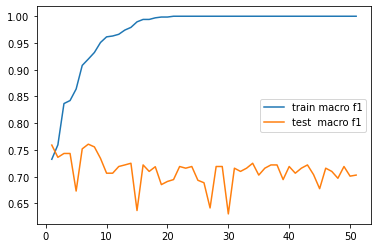

Choose max_depth: max training f1 is:  1.0  corresponding depth is:  20


In [9]:
def prune_tree(trainX, trainY, max_depth):
    tr_f1 = []
    ts_f1 = []
    for i in range(1, max_depth):
        print("----depth: ", i)
        clf = DecisionTreeClassifier(max_depth = i) # Create Decision Tree classifer object
        clf = clf.fit(trainX,trainY)   # Train  Decision Tree Classifer 

        y_pred_tr = clf.predict(trainX)
        y_pred    = clf.predict(testX) # Predict the response for test dataset
        
        # Report
        #macro_tr = precision_recall_fscore_support(trainY, y_pred_tr, average='macro')[2]
        
        # ------------------changes# ------------------changes# ------------------changes
#         scores = cross_val_score(clf, trainX, trainY, cv=5, scoring='f1_macro')
#         macro_tr = sum(scores)/len(scores)
        # ------------------changes# ------------------changes# ------------------changes
        macro_tr = precision_recall_fscore_support(trainY, y_pred_tr, average='macro')[:-1]
        macro_ts = precision_recall_fscore_support(y_true, y_pred, average='macro')[:-1]
        print("train: ", macro_tr, roc_auc_score(trainY, y_pred_tr))
        print("test:  ", macro_ts, roc_auc_score(y_true, y_pred))
        macro_tr = macro_tr[2]
        macro_ts = macro_ts[2]
        tr_f1.append(macro_tr)
        ts_f1.append(macro_ts)
        print(' ')
    plt.plot(range(1, max_depth), tr_f1, label = "train macro f1")
    plt.plot(range(1, max_depth), ts_f1, label = "test  macro f1")
    plt.legend()
    plt.savefig("prune.png")
    plt.show()
    print("Choose max_depth: max training f1 is: ", max(tr_f1), " corresponding depth is: ", tr_f1.index(max(tr_f1)))
    #print(tr_f1, tr_f1.index(max(tr_f1)))
prune_tree(trainX=trainX, trainY=trainY, max_depth=52)

## 2. Taccling Imbalance 

In [ ]:
# Smote

In [23]:
import imblearn

In [24]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(trainX, trainY)

In [25]:
X

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.200550,0.379510,0.396410,2.047200,32.351000,0.388250,0.249760,1.330500,1.138900,0.504940,...,348690.000000,0.121960,0.397180,0.878040,0.001924,8.416000,5.137200,82.658000,4.415800,7.427700
1,0.209120,0.499880,0.472250,1.944700,14.786000,0.000000,0.258340,0.996010,1.699600,0.497880,...,2304.600000,0.121300,0.420020,0.853000,0.000000,4.148600,3.273200,107.350000,3.400000,60.987000
2,0.248660,0.695920,0.267130,1.554800,-1.152300,0.000000,0.309060,0.436950,1.309000,0.304080,...,6332.700000,0.241140,0.817740,0.765990,0.694840,4.990900,3.951000,134.270000,2.718500,5.207800
3,0.081483,0.307340,0.458790,2.492800,51.952000,0.149880,0.092704,1.866100,1.057100,0.573530,...,20545.000000,0.054015,0.142070,0.945980,0.000000,4.574600,3.614700,86.435000,4.222800,5.549700
4,0.187320,0.613230,0.229600,1.406300,-7.312800,0.187320,0.187320,0.630700,1.155900,0.386770,...,3186.600000,0.134850,0.484310,0.865150,0.124440,6.398500,4.315800,127.210000,2.869200,7.898000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.003353,0.904024,0.124380,1.170669,-143.827250,0.000000,0.005115,0.106301,1.309517,0.095957,...,1520.428525,0.067130,0.040861,0.900709,0.413804,3.107897,2.565330,344.086105,1.826112,76.438637
1454,-0.744946,2.326894,-0.625491,0.624440,-246.400037,-0.742810,-0.744946,-0.568088,1.393748,-1.326894,...,-208.315732,-0.295023,0.562995,1.199826,-0.583759,2.407605,4.311981,414.164248,0.933099,97.029040
1455,0.084448,0.421266,0.148148,1.439727,6.878547,0.084448,0.089561,1.340475,1.068663,0.556658,...,268748.639705,0.063820,0.149432,0.936183,0.133311,19.121996,6.137022,74.234535,5.060986,3.576263
1456,0.130843,0.411972,0.335745,2.195518,-5.248439,0.130843,0.191535,2.036720,1.096730,0.552824,...,12996.692432,0.087914,0.253340,0.912085,0.023319,6.211735,7.586739,57.172191,6.863742,10.120850


In [26]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1453    1
1454    1
1455    1
1456    1
1457    1
Name: class, Length: 1458, dtype: int64

In [27]:
sum(y)

729

In [28]:
from collections import Counter
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 729, 1: 729})


In [29]:
decision_tree(X, y)

Training result: 
  For metrics = 'macro', precision, recall, f1 score are:  (1.0, 1.0, 1.0) respectivly
  For metrics = 'micro', precision, recall, f1 score are:  (1.0, 1.0, 1.0) respectivly
  For metrics = 'weighted', precision, recall, f1 score are:  (1.0, 1.0, 1.0) respectivly
  For AUC, it's:  1.0
 
Testing result: 
  For metrics = 'macro', precision, recall, f1 score are:  (0.7190999138673557, 0.6995098039215686, 0.7065261865793782) respectivly
  For metrics = 'micro', precision, recall, f1 score are:  (0.7483443708609272, 0.7483443708609272, 0.7483443708609272) respectivly
  For metrics = 'weighted', precision, recall, f1 score are:  (0.7411457352932788, 0.7483443708609272, 0.742475152014394) respectivly
  For AUC, it's:  0.6995098039215686


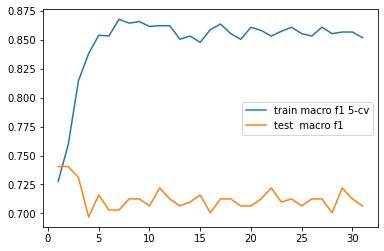

Choose max_depth: max training f1 is:  0.8675480983731785  corresponding depth is:  6


In [30]:
prune_tree(X, y)

In [ ]:
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X,y)   # Train  Decision Tree Classifer 

y_pred_tr = clf.predict(X)
y_pred    = clf.predict(testX) # Predict the response for test dataset

# Report
print("Training result: ")
macro = precision_recall_fscore_support(y, y_pred_tr, average='macro')[:-1]
micro = precision_recall_fscore_support(y, y_pred_tr, average='micro')[:-1]
weighted = precision_recall_fscore_support(y, y_pred_tr, average='weighted')[:-1]
print("  For metrics = 'macro', precision, recall, f1 score are: ", macro, "respectivly")
print("  For metrics = 'micro', precision, recall, f1 score are: ", micro, "respectivly")
print("  For metrics = 'weighted', precision, recall, f1 score are: ", weighted, "respectivly")
print("  For AUC, it's: ", roc_auc_score(y, y_pred_tr))
print(" ")

print("Testing result: ")
macro = precision_recall_fscore_support(y_true, y_pred, average='macro')[:-1]
micro = precision_recall_fscore_support(y_true, y_pred, average='micro')[:-1]
weighted = precision_recall_fscore_support(y_true, y_pred, average='weighted')[:-1]
print("  For metrics = 'macro', precision, recall, f1 score are: ", macro, "respectivly")
print("  For metrics = 'micro', precision, recall, f1 score are: ", micro, "respectivly")
print("  For metrics = 'weighted', precision, recall, f1 score are: ", weighted, "respectivly")
print("  For AUC, it's: ", roc_auc_score(y_true, y_pred))